## 1. Wheat Seeds Dataset

In diesem Datensatz wurde die Struktur drei verschiedener Arten Weizenkörner mit Hilfe von Röntgenstrahlen analysiert. Bei den Weizenarten handelt es sich um Kama, Rosa und kanadischem Weizen. Jede der drei Klassen besteht aus 70 Instanzen.

Zunächst wollen wir eine Mehrklassen-Klassifikation auf den Datensatz anwenden. Da das Dataset nicht sehr komplex ist und keine Ausreißer zu erkennen sind, muss keine zusätzliche Datenvorbereitung/ Datenbereinigung durchgeführt werden. 

1. Kama
<img src="https://justkama.eu/wp-content/uploads/Rokis-1024x1024.jpg" alt= “” width="200" height="200">
2. Rosa
<img src="https://wl-img-prd.s3-accelerate.amazonaws.com/a67ddae8-e16b-424b-a64e-fff80ec5e99c-h.jpeg" alt= “” width="200" height="200">
3. Kanadischer Weizen
<img src="https://cerealscanada.ca/wp-content/uploads/2022/01/cwad.png" alt= “” width="200" height="200">

### Initiales Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

seed_data = pd.read_csv("seed-data.csv", sep=",")

x = seed_data.drop("target", axis=1)
y = np.ravel(seed_data['target'])

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=22)


### Klassifikation - Random Forest Classifier

In [5]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

#print(clf.predict_proba(x_test))
print(clf.predict(x_test))
print(y_test)
print(clf.feature_importances_)

[0 0 1 0 1 2 2 0 1 1 2 1 0 1 1 1 1 0 0 0 0 2 0 1 0 0 2 2 0 2 2 2 2 1 0 0 2
 1 1 2 1 2 0 0 2 1 2 2 2 1 0 2 2 0 1 0 1 0 2 2 1 1 1 1 2 0 0 0 1 2 1 2 0 0
 0 0 0 2 1 0 0 0 2 0]
[0 0 1 0 1 2 2 0 1 1 2 1 1 1 1 1 1 0 0 2 0 2 0 1 0 2 2 2 0 2 2 2 2 1 0 0 2
 1 1 2 1 2 0 0 2 1 2 2 2 1 0 2 2 0 1 0 1 0 2 2 1 1 1 1 2 0 0 2 1 2 1 2 0 0
 2 0 2 2 1 0 0 0 2 2]
[0.16762982 0.15025278 0.06344856 0.13491685 0.14495489 0.09980453
 0.23899258]


### Evaluation

#### Accuracy

Accuracy: 
0.9166666666666666
ca. 92%


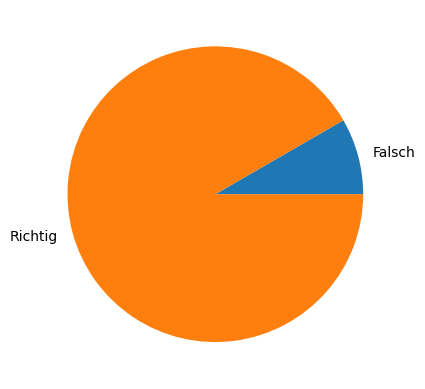

In [14]:
print("Accuracy: ")
print(clf.score(x_test, y_test))

y = np.array([1 - clf.score(x_test, y_test), clf.score(x_test, y_test)])
mylabels = ["Falsch", "Richtig"]
myexplode = [0, 0]

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

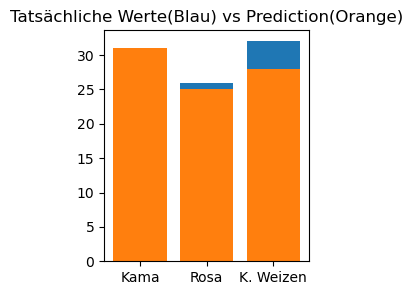

In [4]:
names = ['Kama', 'Rosa', 'K. Weizen']

kama_label = y_test.tolist().count(0)
rosa_label = y_test.tolist().count(1)
kanadian_label = y_test.tolist().count(2)

kama_prediction = clf.predict(x_test).tolist().count(0)
rosa_prediction = clf.predict(x_test).tolist().count(1)
kanadian_prediction = clf.predict(x_test).tolist().count(2)

values_actual = [kama_label,rosa_label,kanadian_label]

values_prediction = [kama_prediction,rosa_prediction,kanadian_prediction]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values_actual)
plt.subplot(131)
plt.bar(names, values_prediction)
plt.title('Tatsächliche Werte(Blau) vs Prediction(Orange)')
plt.show()